# Assignment 3 - Kernels and SVMs

In [2]:
%matplotlib inline

## 1

Let $\mathrm{x}=\left\{ x_{1},\dots,x_{n}\right\}$  be a subset of an input dataset X. Considering the kernel function $k:\mathrm{X}\times\mathrm{X}\rightarrow\mathbb{R}$ which induces a feature space $\phi\left(\mathrm{X}\right)$. 

### a. Apply the kernel trick to the expression "center of mass of the data points in the feature space"

<!-- Note: I first wrote this in LyX and copy&paste all, it's easier that way -->

The equation to calculate the average distance in the feature space for a dataset is:

$$\begin{align}
\frac{1}{n}\sum_{i=1}^{n}\left\Vert \phi\left(x_{i}\right)-\phi_{S}\left(\mathrm{x}\right)\right\Vert _{\phi\left(\mathrm{X}\right)}&=\frac{1}{n}\sum_{i=1}^{n}\left\Vert \phi\left(x_{i}\right)-\frac{1}{n}\sum_{j=1}^{n}\phi\left(x_{j}\right)\right\Vert _{\phi\left(\mathrm{X}\right)}&\textrm{by definition of }\phi_{S}\\&=\frac{1}{n^{2}}\sum_{i=1}^{n}\left\Vert n\phi\left(x_{i}\right)-\sum_{j=1}^{n}\phi\left(x_{j}\right)\right\Vert _{\phi\left(\mathrm{X}\right)}&\\&=\frac{1}{n^{2}}\sum_{i=1}^{n}\left\Vert \sum_{j=1}^{n}\phi\left(x_{i}\right)-\phi\left(x_{j}\right)\right\Vert _{\phi\left(\mathrm{X}\right)}&\\&=\frac{1}{n^{2}}\sum_{i=1}^{n}\sqrt{\left\langle \sum_{j=1}^{n}\phi\left(x_{i}\right)-\phi\left(x_{j}\right),\sum_{j=1}^{n}\phi\left(x_{i}\right)-\phi\left(x_{j}\right)\right\rangle }&\textrm{because }\left\langle x,x\right\rangle =\left\Vert x\right\Vert ^{2}\\&=\frac{1}{n^{2}}\sum_{i=1}^{n}\sqrt{\left\langle \sum_{\substack{j=0\\
j\neq i
}
}^{n}\phi\left(x_{i}\right)-\phi\left(x_{j}\right),\sum_{\substack{j=0\\
j\neq i
}
}^{n}\phi\left(x_{i}\right)-\phi\left(x_{j}\right)\right\rangle }&\phi\left(x_{i}\right)-\phi\left(x_{i}\right)=\mathbf{0}
\end{align}$$

Let's define y_{j}=\phi\left(x_{i}\right)-\phi\left(x_{j}\right) to simplify a little calculations.

$$\frac{1}{n}\sum_{i=1}^{n}\left\Vert \phi\left(x_{i}\right)-\phi_{S}\left(\mathrm{x}\right)\right\Vert _{\phi\left(\mathrm{X}\right)}=\frac{1}{n^{2}}\sum_{i=1}^{n}\sqrt{\left\langle \sum_{j=1}^{n}y_{j},\sum_{j=1}^{n}y_{j}\right\rangle }$$

Because the dot product is conmutative over addition, we could think of $\left\langle \sum_{j=1}^{n}y_{j},\sum_{j=1}^{n}y_{j}\right\rangle$ as if we were trying to square an addition, something like $\left(\sum_{j=1}^{n}y_{j}\right)^{2}$ (where $y_{j}$ behaves as a regular variable), and that is actually quite neat. It's interesting to note that $\left(\sum_{j=1}^{n}y_{j}\right)^{2}$ reduces to $\sum_{j=1}^{n}\sum_{k=1}^{n}y_{j}y_{k}$ or in dot product notation $\sum_{j=1}^{n}\sum_{k=1}^{n}\left\langle y_{j},y_{k}\right\rangle$.

$$\begin{align}
\frac{1}{n}\sum_{i=1}^{n}\left\Vert \phi\left(x_{i}\right)-\phi_{S}\left(\mathrm{x}\right)\right\Vert _{\phi\left(\mathrm{X}\right)}&=\frac{1}{n^{2}}\sum_{i=1}^{n}\sqrt{\sum_{j=1}^{n}\sum_{k=1}^{n}\left\langle y_{j},y_{k}\right\rangle }\\&=\frac{1}{n^{2}}\sum_{i=1}^{n}\sqrt{\sum_{j=1}^{n}\sum_{k=1}^{n}\left\langle \phi\left(x_{i}\right)-\phi\left(x_{j}\right),\phi\left(x_{i}\right)-\phi\left(x_{k}\right)\right\rangle }\\&=\frac{1}{n^{2}}\sum_{i=1}^{n}\sqrt{\sum_{j=1}^{n}\sum_{k=1}^{n}\left\langle \phi\left(x_{i}\right),\phi\left(x_{i}\right)\right\rangle +\left\langle \phi\left(x_{j}\right),\phi\left(x_{k}\right)\right\rangle -\left\langle \phi\left(x_{i}\right),\phi\left(x_{j}\right)\right\rangle -\left\langle \phi\left(x_{i}\right),\phi\left(x_{k}\right)\right\rangle }
\end{align}
$$

Now that we wrote were able to write the expression as a combination of simple dot product multiplications, we can apply the trick of the kernel!

$$\frac{1}{n}\sum_{i=1}^{n}\left\Vert \phi\left(x_{i}\right)-\phi_{S}\left(\mathrm{x}\right)\right\Vert _{\phi\left(\mathrm{X}\right)}=\frac{1}{n^{2}}\sum_{i=1}^{n}\sqrt{\sum_{j=1}^{n}\sum_{k=1}^{n}k\left(x_{i},x_{i}\right)+k\left(x_{j},x_{k}\right)-k\left(x_{i},x_{j}\right)-k\left(x_{i},x_{k}\right)}$$

Note: the expression can be further simplified to just use matrix operations (excluding the square root), but that is left as future work, just in case there were many datapoints and some optimizations should be done.

### b. Use the expression found in the previous exercise to calculate the average distance to the center of mass for the following dataset and kernels:

$$\mathrm{x}=\left\{ (0,1),(-1,3),(2,4),(3,-1),(-1,-2) \right\}$$

In [2]:
x = [(0,1),(-1,3),(2,4),(3,-1),(-1,-2)]

In [3]:
from typing import List, Tuple, Callable
from math import sqrt, exp

def avg_to_center_of_mass(x : List[Tuple[float,float]], ker: Callable[[float,float],float]) -> float:
    n = len(x)
    avg = 0
    for i in x:
        avg += sqrt(sum((ker(i,i)+ker(j,k)-ker(i,j)-ker(i,k)) for j in x for k in x))
    return avg / (n*n)

#avg_to_center_of_mass.__annotations__ # interesting, but python doesn't check it at all :(

In [4]:
lineal_ker = lambda x,y: x[0]*y[0]+x[1]*y[1]
squared_ker = lambda x,y: lineal_ker(x,y)**2
third_ker = lambda x,y: (lineal_ker(x,y)+1)**5
gaussian_dev_1_ker = lambda x,y: exp(-((x[0]-y[0])**2+(x[1]-y[1])**2))

i. lineal kernel

In [5]:
print( avg_to_center_of_mass(x, lineal_ker) )

2.5991877273570343


ii. squared kernel

In [6]:
print( avg_to_center_of_mass(x, squared_ker) )

7.93374823939363


iii. some polynomial kernel

In [7]:
print( avg_to_center_of_mass(x, third_ker) )

699.7672616263939


iv. a gaussian kernel

In [8]:
print( avg_to_center_of_mass(x, gaussian_dev_1_ker) )

0.8941212374982302


To check that the values calculated above are right, let's try to calculate directly the expression with some induced $\phi$s

In [9]:
import numpy as np

def avg_to_center_using_phi(x, phi):
    n = x.shape[0]
    phi_x = np.apply_along_axis(phi, 1, x)
    phi_S = np.sum(phi_x, axis=0) / n
    return np.sum( np.sqrt( np.sum( (phi_x - phi_S)**2, axis=1 ) ) ) / n

x_ = np.array(x)

lineal_phi = lambda x: x
sqrt2 = sqrt(2)
squared_phi = lambda x: (x[0]**2,x[1]**2,sqrt2*x[0]*x[1])
sqrt5 = sqrt(5)
# (x+y+1)**5 = x**5 + 5*x**4*y + 5*x**4 + 10*x**3*y**2 + 20*x**3*y + 10*x**3 + 10*x**2*y**3
#             + 30*x**2*y**2 + 30*x**2*y + 10*x**2 + 5*x*y**4 + 20*x*y**3 + 30*x*y**2
#             + 20*x*y + 5*x + y**5 + 5*y**4 + 10*y**3 + 10*y**2 + 5*y + 1
poly_phi = lambda x: ( x[0]**5               , sqrt(5)*x[0]**4*x[1] , sqrt(5)*x[0]**4          , sqrt(10)*x[0]**3*x[1]**2 ,
                       sqrt(20)*x[0]**3*x[1] , sqrt(10)*x[0]**3     , sqrt(10)*x[0]**2*x[1]**3 , sqrt(30)*x[0]**2*x[1]**2 ,
                       sqrt(30)*x[0]**2*x[1] , sqrt(10)*x[0]**2     , sqrt(5)*x[0]*x[1]**4     , sqrt(20)*x[0]*x[1]**3    ,
                       sqrt(30)*x[0]*x[1]**2 , sqrt(20)*x[0]*x[1]   , sqrt(5)*x[0]             , x[1]**5                  ,
                       sqrt(5)*x[1]**4       , sqrt(10)*x[1]**3     , sqrt(10)*x[1]**2         , sqrt(5)*x[1]             ,
                       1)

#print("Checking kernels with phis")
#print(third_ker(x[0], x[1]))
#print(np.sum( np.multiply( poly_phi(x[0]), poly_phi(x[1])) ) )

print("Average distance to center of mass with kernels:")
print("Lineal kernel =>", avg_to_center_using_phi(x_, lineal_phi))
print("Squared kernel =>", avg_to_center_using_phi(x_, squared_phi))
print("Polynomial kernel =>", avg_to_center_using_phi(x_, poly_phi))

Average distance to center of mass with kernels:
Lineal kernel => 2.5991877273570343
Squared kernel => 7.93374823939363
Polynomial kernel => 699.7672616263939


So, the expression seems to be alright!! :D

## 2. Playing with LinearSVMs

**a.** Loading (downloading) MNIST dataset

In [69]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=".")

Some of the images from the dataset

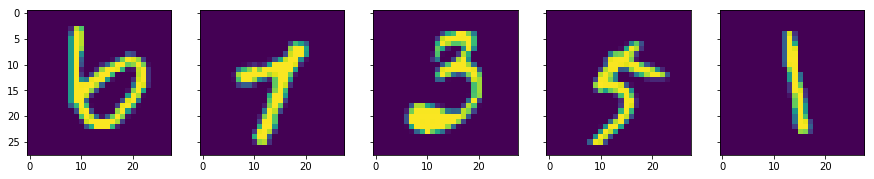

In [71]:
import matplotlib.pyplot as plt
from random import randint
import random

def plot_image(X, seed=3241, kwargs_for_imshow={} ):
    random.seed( seed )
    n = X.shape[0]

    f, axes = plt.subplots(1, 5, sharey=True, figsize=(15,3))
    for i in range(5):
        axes[i].imshow( X[ randint(0,n-1) ].reshape( (28,28) ), **kwargs_for_imshow )
        
plot_image( mnist['data'] )

**b.** Normaling features (or, scaling features, in SciKit parlance)

In [12]:
from sklearn.preprocessing import StandardScaler

mnist_scaled = mnist.copy()
mnist_scaled['data'] = mnist['data'].astype( np.float64 )

scaler = StandardScaler()
scaler.fit( mnist_scaled['data'] )
mnist_scaled['data'] = scaler.transform( mnist_scaled['data'] )

The same images as before, but now after they have been scaled

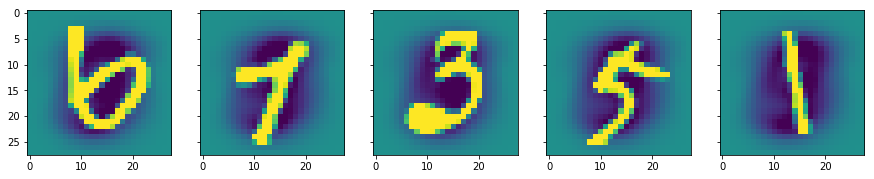

In [72]:
plot_image( mnist_scaled['data'], kwargs_for_imshow={'clim': (-1,1)} )

It's interesting to see a "black" region in the center of every image. This black region, in which all values are negative, indicates where most of information is located. Rarely (or maybe never) a number is drawn so that it touches/uses the outermost pixels, so there's not much information in there, but there is a lot of near the center of the image.

**c.** Taking two classes and training a linear SVM on them. Selecting optimal C value for them.

In [205]:
def two_classes(dataset, target, class1, class2):
    index = (target == class1) | (target == class2)
    X = dataset[ index ]
    y = target[ index ]
    #y[ y==class1 ] = -1
    #y[ y==class2 ] = 1
    return X, y

X, y = two_classes( mnist_scaled['data'], mnist['target'], 1, 0 )

Some datapoints from the dataset of 1 and 0's

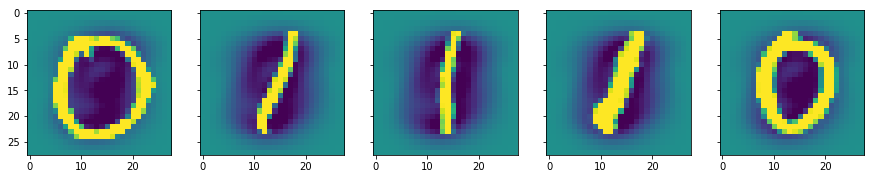

In [206]:
plot_image( X, kwargs_for_imshow={'clim': (-1,1)} )

In [207]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=5431)

Searching for the best C parameter between the values $\left\{2^{-15}, 2^{-14}, \dots, 2^{10}\right\}$

In [214]:
from sklearn.svm import LinearSVC

C_exp = list(range(-15, 11))
scores = []

for i in range(len(C_exp)):
    #print( "2**{}".format(C_exp[i]), end="\t" )
    clf = LinearSVC(random_state=423, C=2**C_exp[i], loss='hinge')
    clf.fit( X_train, y_train )
    sc = clf.score(X_test, y_test)
    #print( sc )
    scores.append( sc )
    print("*", end="")
print()

**************************


And the plot of trying all possible combinations

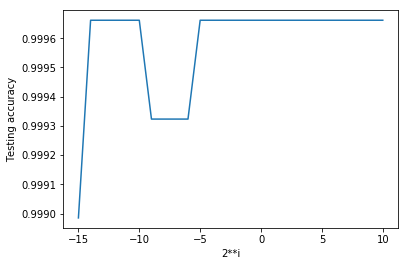

In [215]:
plt.xlabel("2**i")
plt.ylabel("Testing accuracy")
plt.plot(C_exp, scores)
plt.show()

The best value for C seems to be any value between $2^{-14}$ and $2^{10}$. Now, remember that the bigger the value $C$ is the more will the model overfit. We don't want the model to overfit, therefore I select $2^{-14} as the optimal value for C.

**d and e.** Extracting weights from classification and ploting them in the shape of the images ($28\times28$)

In [218]:
clf = LinearSVC(random_state=423, C=2**-14, loss='hinge')
clf.fit( X_train, y_train )

LinearSVC(C=6.103515625e-05, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=423, tol=0.0001, verbose=0)

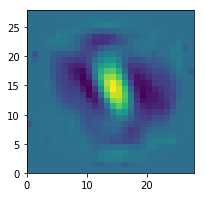

In [219]:
plt.figure( figsize=(3,3) )
plt.pcolor( clf.coef_.reshape( (28,28) ) )

DISCUSS e and f

## 3. Playing with kernels for strings

In [3]:
%load_ext Cython

The code below is an implementation of the Fast Substring Kernel (SSK) proposed by Lodhi et al. (2002) written in Cython. I took the code from an implementation I did some months back, you can find it in the following url:

https://github.com/helq/python-ssk

In [4]:
%%cython

# Cython code, make sure you have Cython installed ;)
import numpy as np
cimport numpy as np

from cpython cimport array
import array

cimport cython

def ssk(s, t, int n, float lbda, accum=False):
    """s and t are strings, either numpy.str_ or python str, or a list of chars"""
    s_array = array.array('l', [ord(c) for c in s])
    t_array = array.array('l', [ord(c) for c in t])
    return ssk_array(s_array, t_array, n, lbda, accum)

# Kernel defined by Lodhi et al. (2002)
@cython.boundscheck(False) # turn off bounds-checking for entire function
@cython.wraparound(False)  # turn off negative index wrapping for entire function
def ssk_array(array.array s_, array.array t_, int n, float lbda, accum=False):
    cdef int lens, lent
    cdef int i, sj, tk
    cdef float toret
    cdef long[:] s # this reduces the overhead 10x fold!!!
    cdef long[:] t

    s = s_ if s_.typecode == 'l' else array.array('l', [int(c) for c in s_])
    t = t_ if t_.typecode == 'l' else array.array('l', [int(c) for c in t_])

    lens, lent = len(s), len(t)
    #k_prim = (-1)*np.ones( (n+1, lens, lent) )
    cdef np.ndarray[np.float64_t, ndim=3] \
        k_prim = np.zeros( (n, lens, lent), dtype=np.float )

    k_prim[0,:,:] = 1

    for i in range(1,n):
        for sj in range(i,lens):
            toret = 0.
            for tk in range(i,lent):
                if s[sj-1]==t[tk-1]: # trick taken from shogun implemantion of SSK
                    toret = lbda * (toret + lbda*k_prim[i-1,sj-1,tk-1])
                else:
                    toret *= lbda
                k_prim[i,sj,tk] = toret + lbda * k_prim[i, sj-1, tk]

    cdef int start = 0 if accum else n-1
    cdef float k = 0.

    for i in range(n):
        for sj in range(i,lens):
            for tk in range(i,lent):
                if s[sj]==t[tk]:
                    k += lbda*lbda*k_prim[i,sj,tk]

    # print( [len(list(i for (sj,tk,i) in k_prim if i==m-1)) for m in range(n)] )
    return k

def string_kernel(xs, ys, n, lbda):
    """xs and ys are numpy arrays of strings or arrays of ints, n an integer and lbda a bool"""
    if len(xs.shape) != 2 or len(ys.shape) != 2 or xs.shape[1] != 1 or ys.shape[1] != 1:
        raise "The shape of the features is wrong, it must be (n,1)"

    cdef int lenxs, lenys
    cdef int i, j
    cdef np.ndarray[np.float64_t, ndim=2] mat, mat_xs, mat_ys
    lenxs, lenys = xs.shape[0], ys.shape[0]

    mat = np.zeros( (lenxs, lenys) )

    ssk_fun = ssk_array if xs.dtype == 'O' and isinstance(xs[0,0], array.array) else ssk

    # If both lists are equal, then the resulting matrix is symetric, there is no need to
    # calculate the hole thing
    if lenxs == lenys and np.array_equal(xs, ys):
        for i in range(lenxs):
            for j in range(i,lenys):
                mat[j,i] = mat[i,j] = ssk_fun(xs[i,0], ys[j,0], n, lbda, accum=True)

        mat_xs = mat_ys = mat.diagonal().reshape( (lenxs, 1) )

    else:
        for i in range(lenxs):
            for j in range(lenys):
                mat[i,j] = ssk_fun(xs[i,0], ys[j,0], n, lbda, accum=True)

        mat_xs = np.zeros( (lenxs, 1) )
        mat_ys = np.zeros( (lenys, 1) )

        for i in range(lenxs):
            mat_xs[i] = ssk_fun(xs[i,0], xs[i,0], n, lbda, accum=True)
        for j in range(lenys):
            mat_ys[j] = ssk_fun(ys[j,0], ys[j,0], n, lbda, accum=True)

    return np.divide(mat, np.sqrt(mat_ys.T * mat_xs))

In [5]:
def get_ssk_kernel_for_scikit(lambda_decay, max_substring):
    def strker(il,ir):
        #print("Shape of gramm matrix to create ({},{})".format(len(il), len(ir)))
        l = np.array(il).reshape( (len(il), 1) )
        r = np.array(ir).reshape( (len(ir), 1) )
        return string_kernel(l,r,lambda_decay, max_substring)
    return strker

lambda_decay = .8
max_substring = 5

my_ssk_kernel = get_ssk_kernel_for_scikit(lambda_decay, max_substring)

In [8]:
my_ssk_kernel("caadadr", "caadadt")

ValueError: cannot reshape array of size 1 into shape (7,1)